<a href="https://colab.research.google.com/github/mffg1993/FourierOpticsWithPython/blob/main/FourierOpticsInPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Transform Cartesian coordinates to polar or cylindrical
#
# Description: Transforms corresponding elements of the two-dimensional Cartesian
#              coordinate arrays x and y into polar coordinates phi and rho.
#
# Parameters:
#              - X and Y are 2D Cartesian Coordinate arrays
#
# Output:
#              - Rho and Phi are 2D Cartesian Coordinate arrays
def cart2pol(X, Y):
    rho = np.sqrt(X**2 + Y**2)
    phi = np.arctan2(Y, X)
    return(Rho, Phi)

# Implementation of the rectangular function
#
# Description: Implements a rectangle function with unit amplitude and
#              centered at 0
#
# Parameters:
#              - X is an array that corresponds to the domain where the function
#.               is going to be applied
#
# Output:
#              - An array of the rectangle function
def rect(X1):
    return np.where(np.abs(X)<=0.5, 1, 0)

# Intensity and Phase plots
def TotInt(Ex):
  plt.figure(figsize=(9, 6))
  plt.subplot(121)
  plt.imshow(abs(Ex)**2,cmap="gist_gray")
  plt.axis('off')
  plt.subplot(122)
  plt.imshow(np.angle(Ex),cmap='hsv')
  plt.axis('off')
  plt.show()

# **Fourier Optics in Python - Based on *Computational Fourier Optics* by Voelz**



---


## **1.  Scalar Diffraction and propagation Solutions**




### *1.1 Fresnel Trasnfer Function Propagator*

It is possible to find the amplitude of the field $U_2(x,y)$ at the plane of interest as

$$U_2(x,y)=\mathcal{F}\bigg\{ \, \mathcal{F}\big\{U_1(x,y)\big\} \, H(f_x,f_y)\bigg\}, $$

and uses the transfer fucntion $H$ given by

$$H(f_x,f_y)=e^{i k z} \exp\big[-i \pi \lambda z (f_x^2+f_y^2)\,\big]$$

In [ ]:
# Fresnel propagation using the Transfer function approach
#
# Description: Takes the source field u1 and calculates the field u2 at the observation
#              plane z using the Transfer Function approach. It assumes uniform sampling
#              at the source plane.
#
# Parameters:
#              - u1 is a 2D square array of the field at the source planes
#              - L is the sidelength of the simulation window of the source plane
#              - la is the considered wavelenght in the simulation
#              - z is the propagation distance of the observation plane
#
# Output:
#              - u2 is a 2D square array of the field at the observation planes

def propTF(u1,L,la,z):
  M,nn=u1.shape      #
  dx=L/M
  fx=np.arange(-1/(2*dx),1/(2*dx),1/L)
  Fx, Fy = np.meshgrid(fx, fx)

  H=np.exp(-1j*np.pi*la*z*(Fx**2+Fy**2))

  U2=H*np.fft.fftshift(np.fft.fft2(u1))

  u2=np.fft.ifft2(np.fft.ifftshift(U2))
  return u2


### *1.2 Fresnel Impulse Response (IR) Propagator*

Similarly, we can define

$$U_2(x,y)=\mathcal{F}\bigg\{ \, \mathcal{F}\big\{U_1(x,y)\big\} \, \mathcal{F}\big\{h(x,y)\big\} \bigg\}. $$

where the impulse response $h$ is given by

$$h(x,y)=\frac{e^{i k z}}{i \lambda z} \exp\bigg[\frac{ik}{2z} (x^2+y^2)\,\bigg].$$


In [ ]:
# Fresnel propagation using the impulse response approach
#
# Description: Takes the source field u1 and calculates the field u2 at the observation
#              plane z using the impulse response approach. It assumes uniform sampling
#              at the source plane.
#
# Parameters:
#              - u1 is a 2D square array of the field at the source planes
#              - L is the sidelength of the simulation window of the source plane
#              - la is the considered wavelenght in the simulation
#              - z is the propagation distance of the observation plane
#
# Output:
#              - u2 is a 2D square array of the field at the observation planes

def propIR(u1,L,la,z):
  M,nn=u1.shape      #
  dx=L/M
  k=2 *np.pi/la
  x=np.arange(-L/2,L/2,dx)
  X,Y=np.meshgrid(x,x)
  h=(1/(1j*la*z))*np.exp(1j*k/(2*z)*(X**2+Y**2))
  H=np.fft.fftshift(np.fft.fft2(h))*dx**2
  U1=np.fft.fftshift(np.fft.fft2(u1))
  U2=H*U1
  u2=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(U2)))
  return u2


### *1.3 Square Beam Example*

As an example, we can define the case of a square beam,
$$u_1(x,y)=\text{rect}\bigg(\frac{x}{2w}\bigg)\text{rect}\bigg(\frac{y}{2w}\bigg)$$
where $w$ is the half width of the square aperture. For our simulation, we define a simulation window of dimensions 0.5m x 0.5m. The square aperture is ilumniated by a unit-amplitude plane wave from the backside, where $\lambda=0.5\, \mu$m.


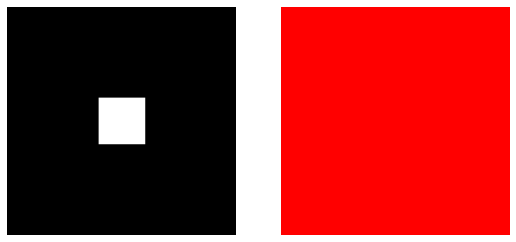

In [ ]:
lam=0.5E-6;     # [mm] wavelength
k=2*np.pi/lam;  # [m^-1] wavenumber
w=0.051;        # [m]  Source half width
z=2000;         # [m]  Propagation distance

L1=0.5          # Simulation window side length
M=250           # Number of samples
dx1=L1/M         # Source sample interval
x1=np.arange(-L1/2,L1/2,dx1) # Source Coordinates
y1=x1

# Field definition
X1,Y1=np.meshgrid(x1,y1)
u1=rect(X1/(2*w))*rect(Y1/(2*w)); #src field

# Intensity and phase profiles of the source field at the aperture plane
TotInt(u1)

#### *1.3.1* Fresnel Propagation at z=2000 using the transfer function method

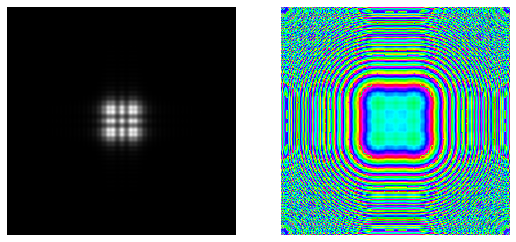

In [ ]:
u2TF=propTF(u1,L1,lam,z)
TotInt(u2TF)

#### *1.3.2 Fresnel Propagaion at z=2000 using the impulse response method (Not working)*

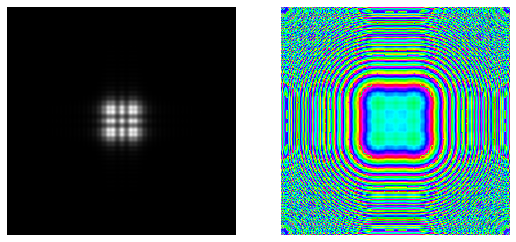

In [ ]:
u2IR=propIR(u1,L1,lam,2000)
TotInt(u2IR)

### *1.4 Sampling regimes and criteria*

Due to the numerical nature of the FFT, the fields could display artifacts due to the discrete sampling. Therefore, we can define the critical sampling condition:
$$\Delta x = \frac{\lambda z}{L} $$

We can resume the artifacts in this table.







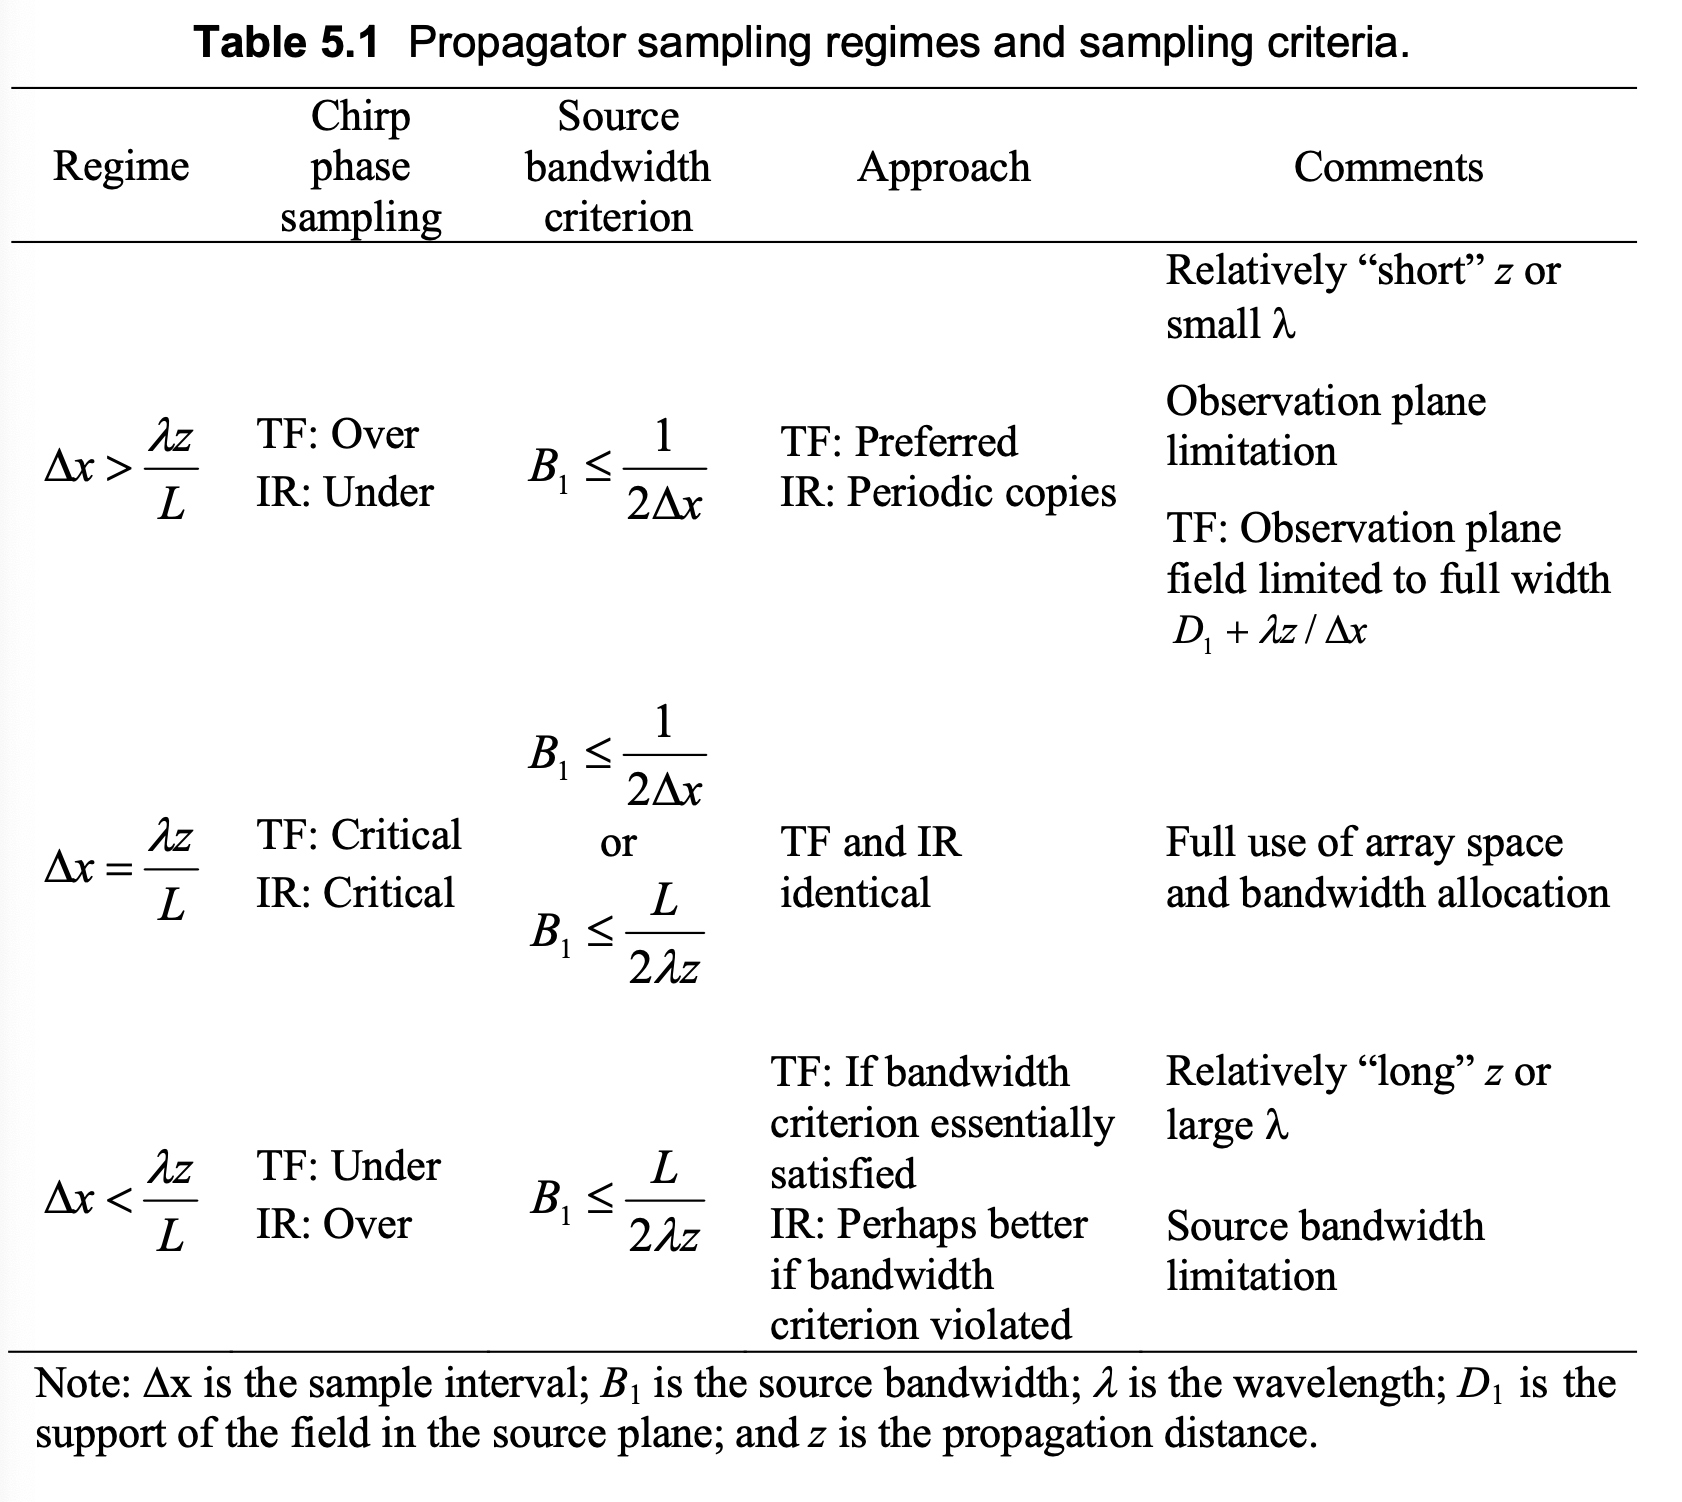





- $\Delta x > \lambda z/L$: The “short distance” regime. Here, the support size available in the observation plane is limited. For the TF approach the size of the field in the observation plane that can be represented accurately is roughly D1 + λz/Δx (see Appendix A). This limitation is usually not a problem, as the observation plane field is often negligible beyond the full width of D1 + λz/Δx. Thus, the TF approach generally provides good results in this regime. The undersampled IR phase function has an aliased, periodic phase representation, and using this approach produces periodic copies of the field. The source bandwidth B1 is only limited in the usual way by the sampling theorem in the source plane.
- $\Delta x = \lambda z/L$: This is the critical sampling situation where, remarkably, the sampled H and h functions as an FFT pair, turn out to have values that exactly match the analytic functions H and h (Appendix A). Under this condition the full bandwidth of the sampled array (1/2Δx) is available for modeling the source, and the full area of the array in the observation plane can be used.
- $\Delta x < \lambda z/L$: The “long distance” regime. Here, the bandwidth available for the source field becomes limited. The H chirp has an aliased phase form, where any significant source bandwidth that extends beyond L/(2λz) leads to artifacts using the TF approach. Applying the IR approach actually corresponds to windowing, or filtering the source frequency content beyond ~ L/(2λz). This leads to “smoother,” but not always accurate, results.

### *1.5 Fraunhofer Propagation*

The Fraunhofer propagation is given by:

$$U_2(x_2,y_2)=\frac{e^{i k z}}{i \lambda z} \exp\bigg\{ \frac{ik}{2z} (x_2^2+y_2^2)\bigg\} \int \int U_1(x_1,y_1)\\
\times \exp\bigg\{ -\frac{i 2\pi }{\lambda z} (x_1 x_2+y_1y_2)\bigg\} dx_1 dy_1, $$

which corresponds to a 2D Fourier transform of the source field. In addition, the lenghts of the windows at the source and observation planes are not the same. We can define the observation plane side length and sample interval are
found in terms of the source plane parameters,

$$L_2=\frac{\lambda z}{\Delta x_1} \ \ \ \text{and} \ \ \ \Delta x_2=\frac{\lambda z}{L_1}$$

In [ ]:
def propFF(u1,L1,la,z):
  M,nn=u1.shape
  dx1=L1/M
  k=2*np.pi/la
  L2=la*z/dx1
  dx2=la*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)
  X2,Y2=np.meshgrid(x2,x2);
  c=1/(1j*la*z)*np.exp(1j*k/(2*z)*(X2**2+Y2**2))
  u2=c*np.fft.fftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return [u2,L2,u21,u22]

In order to get a good approximation of the field is given when
$$\Delta x_1 \geq \frac{\lambda z}{L1}.$$
If this condtion is not satisfied, the chirp phase will be aliased when tacked on the front of the transform. Furthermore, consider the Fresnel number, where $w^2/\lambda z << 1 $ in the Fraunhofer regime, and combine the previous condition, we find

$$L_1>> \frac{w^2}{\Delta x_1},\ \ \ \text{or} \ \ \ M>>\frac{w^2}{\Delta x_1^2}$$


#### *1.5.1 Square aperture Example*

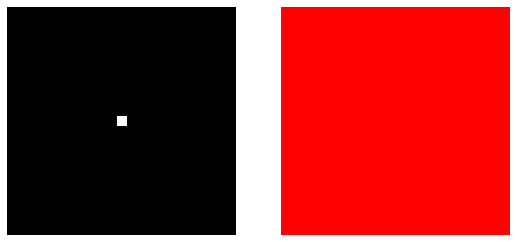

In [ ]:
w=0.011;        # [m]  Source half width
u1=rect(X1/(2*w))*rect(Y1/(2*w)); #src field

# Intensity and phase profiles of the source field at the aperture plane
TotInt(u1)



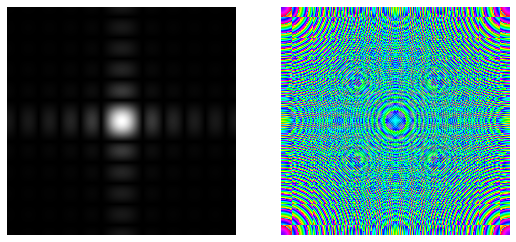

In [ ]:
u2fh,L2fh=propFF(u1,L1,lam,z)
TotInt(np.sqrt(u2fh))

## **2. Transmitance Functions Lenses, and Gratings**

### *2.1 Tilt of the input beam*

An optical beam can be steered in a propagation simulation by applying a “tilt” to the input beam wavefront.

Being the tilting of the plane with respect to the z-direction and adding a rotation the tip of the $k$ vector on the $x-y$ plane, we can model the tilting as

$$t(\alpha, \theta)= \exp\big[ i k(x \cos \theta+ y\sin \theta) \tan \alpha \big]$$

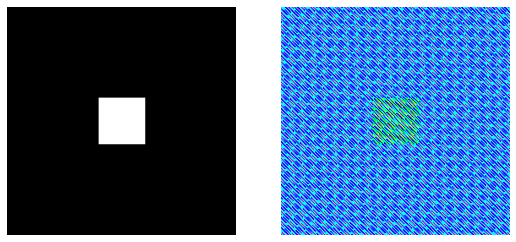

In [ ]:
def tilt(uin,X,Y,k,alpha,theta):
  a=np.tan(alpha)*np.exp(1j*k*(X1*np.cos(theta)+Y1*np.sin(theta)))
  return a*uin

lam=0.5E-6;     # [mm] wavelength
k=2*np.pi/lam;  # [m^-1] wavenumber
w=0.051;        # [m]  Source half width
z=2000;         # [m]  Propagation distance

L1=0.5          # Simulation window side length
M=250           # Number of samples
dx1=L1/M         # Source sample interval
x1=np.arange(-L1/2,L1/2,dx1) # Source Coordinates
y1=x1

# Field definition
X1,Y1=np.meshgrid(x1,y1)
u1=rect(X1/(2*w))*rect(Y1/(2*w)); #src field

u1t=tilt(u1,X1,Y1,k,0.0000001,np.pi/12) # Tilt
TotInt(u1t)

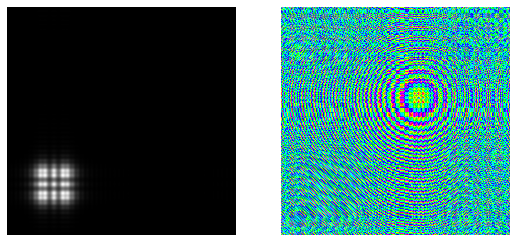

In [ ]:
u2TFt=propTF(u1t,L1,lam,z)
TotInt(u2TFt)
